In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm
import sys
import matplotlib as mpl

#insert path
sys.path.insert(0, '../methods/')

sys.modules.pop('generate_syn_data', None)
from generate_syn_data import *

sys.modules.pop('ARWQE', None)
from ARWQE import *

sys.modules.pop('plots', None)
from plots import *

In [ ]:
tasks = ['linreg', 'mean']
shifts = ['stationary', 'nonstationary']

fixed_windows = [1, 4, 16, 64, 256, 1024]
train_windows = [1, 64, 256, 1024] 
methods = methods = ['ARW'] + ['weighted'] + [f'Val_{k}' for k in fixed_windows]

alpha = 0.1
num_trials = 50

#B_j from 1 to 10 for all settings


linreg stationary
train window: 1
[0.00942127 0.00929073 0.15254322 0.05751813 0.0284916  0.01545269
 0.01032009 0.00929073]


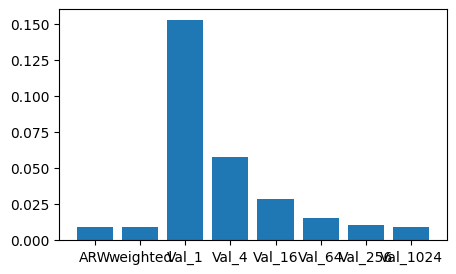

train window: 64
[0.0094594  0.00931918 0.15249913 0.05758384 0.0285106  0.0154928
 0.01038782 0.00931918]


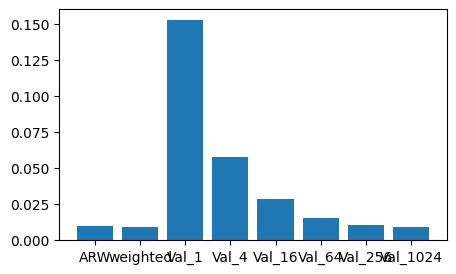

train window: 256
[0.00939393 0.00925869 0.1524574  0.05744338 0.02852862 0.01543682
 0.01028964 0.00925869]


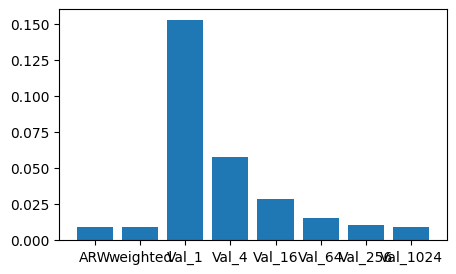

train window: 1024
[0.00940338 0.00928013 0.15250051 0.05750367 0.028595   0.01544633
 0.01030853 0.00928013]


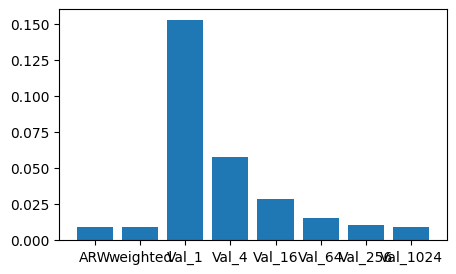

linreg nonstationary
train window: 1
[0.03538793 0.07806524 0.15964527 0.05739333 0.03282418 0.03539327
 0.05429762 0.08001184]


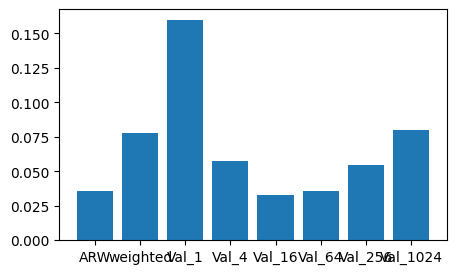

train window: 64
[0.03567591 0.07751153 0.15965896 0.05736409 0.03282311 0.03553624
 0.05393322 0.07945771]


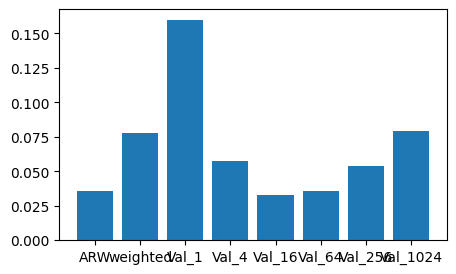

train window: 256
[0.03619116 0.0746484  0.15956144 0.05741496 0.03283133 0.03558207
 0.05184702 0.07666809]


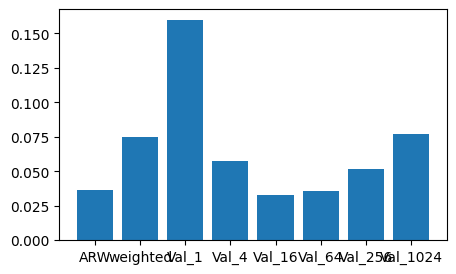

train window: 1024
[0.03646782 0.07203502 0.15965556 0.05754547 0.0329998  0.03568944
 0.05093404 0.07402782]


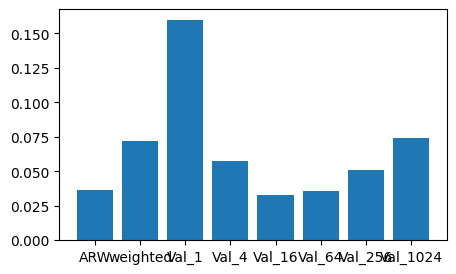

mean stationary
train window: 1
[0.00609674 0.00595922 0.15333164 0.05593112 0.02673616 0.01324151
 0.00719007 0.00595922]


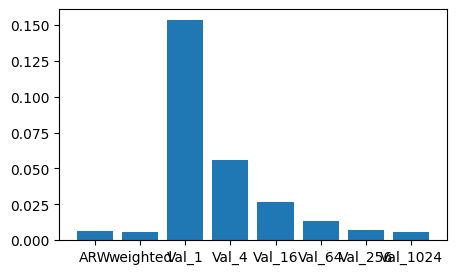

train window: 64
[0.00639152 0.00626766 0.15305048 0.05562565 0.02664081 0.01336394
 0.00730756 0.00626766]


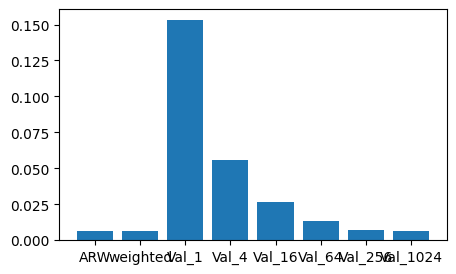

train window: 256
[0.00637297 0.00625035 0.15290532 0.05566845 0.02662111 0.01342173
 0.00728028 0.00625035]


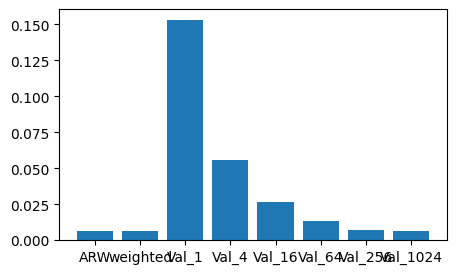

train window: 1024
[0.00639185 0.00626767 0.15292742 0.05571119 0.02663851 0.01348444
 0.00732515 0.00626767]


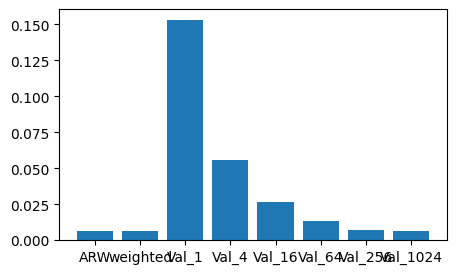

mean nonstationary
train window: 1
[0.03302278 0.0729277  0.15333164 0.05608308 0.03015822 0.02870536
 0.04458297 0.0729277 ]


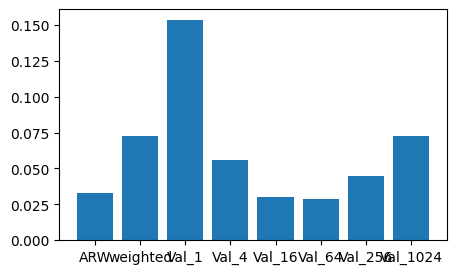

train window: 64
[0.02533508 0.07382485 0.15237665 0.05663232 0.03074518 0.022476
 0.03719757 0.07382485]


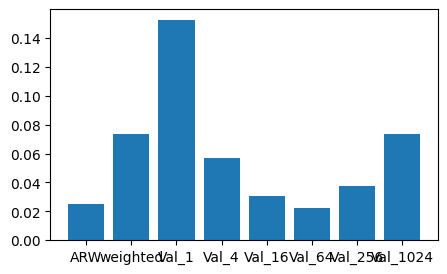

train window: 256
[0.03029461 0.07744505 0.15286478 0.05687782 0.03181509 0.03100275
 0.04515584 0.07744505]


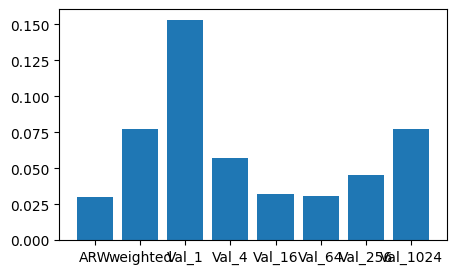

train window: 1024
[0.03445278 0.05391116 0.15337069 0.05752766 0.03316345 0.03392992
 0.05136756 0.05391116]


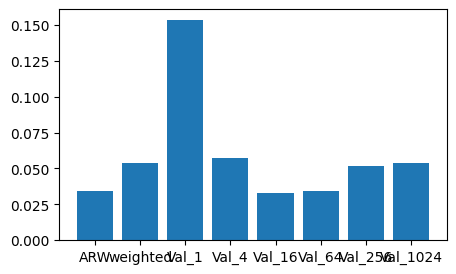

In [13]:
tasks = ['linreg', 'mean']
shifts = ['stationary', 'nonstationary']

fixed_windows = [1, 4, 16, 64, 256, 1024]
train_windows = [1, 64, 256, 1024] 
methods = methods = ['ARW'] + ['weighted'] + [f'Val_{k}' for k in fixed_windows]

alpha = 0.1
num_trials = 50

for task in tasks:
    for shift in shifts:
        print("="*100)
        print(task, shift)
        cdf_array = np.load(f'./results/{task}_{shift}_cdf_array.npy')
        mae_array = np.abs(cdf_array - 1 + alpha)

        for m in range(len(train_windows)):
            print('train window:', train_windows[m])
            mae = np.mean(np.mean(mae_array[:, :, m, 100:], axis=2), axis=0)
            se_ae = np.std(np.mean(mae_array[:, :, m, 100:], axis=2), axis=0) / np.sqrt(num_trials) 
            print(mae)
        
            plt.figure(figsize=(5,3))
            plt.bar(methods, mae)
            plt.show()
